In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [2]:
SEED = 42
TEST_RATIO = 0.3
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
label = 'label'
label_cat = ['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'groundnuts',
       'cowpeas', 'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'cotton', 'coffee']
file_path = r'../data/Crop_recommendation.csv'

# Load the dataset

In [3]:
# load the data
df=pd.read_csv(file_path)

df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


In [6]:
df.label.unique()

array(['rice', 'maize', 'Soyabeans', 'beans', 'peas', 'groundnuts',
       'cowpeas', 'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'cotton', 'coffee'], dtype=object)

In [7]:
df.groupby('label').size()

label
Soyabeans     130
apple         100
banana        130
beans         125
coffee        110
cotton        100
cowpeas       122
grapes        100
groundnuts    100
maize         119
mango         100
orange        122
peas          100
rice          139
watermelon    100
dtype: int64

In [8]:
df[df['label'] =='apple'].describe()

,N,P,K,temperature,humidity,ph,rainfall
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.800000,134.220000,199.890000,22.630942,92.333383,5.929663,112.654779
std,11.863704,8.139665,3.320871,0.827404,1.458551,0.268932,7.102985
min,0.000000,120.000000,195.000000,21.036527,90.025751,5.514253,100.117344
25%,10.000000,126.750000,197.000000,22.163206,90.970127,5.705800,106.070135
50%,24.000000,136.500000,200.000000,22.628290,92.416541,5.885818,112.979230
75%,30.000000,141.000000,203.000000,23.344066,93.509252,6.135616,118.449546
max,40.000000,145.000000,205.000000,23.996862,94.920481,6.499227,124.983162


In [9]:
# show the average feature values for the crop
df.groupby('label').agg('mean')

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
Soyabeans,39.884615,67.907692,80.100000,18.895805,16.965000,7.313676,80.361267
apple,20.800000,134.220000,199.890000,22.630942,92.333383,5.929663,112.654779
banana,99.676923,82.776923,50.200000,27.421228,80.320484,5.941538,104.550156
beans,20.384000,67.576000,20.112000,20.073315,21.649434,5.743870,105.454652
coffee,101.245455,28.854545,30.109091,25.532255,58.851236,6.801889,156.271797
cotton,117.770000,46.240000,19.560000,23.988958,79.843474,6.912675,80.398043
cowpeas,20.434426,47.172131,19.836066,28.494532,85.602507,6.716192,48.779905
grapes,23.180000,132.530000,200.110000,23.849575,81.875228,6.025937,69.611829
groundnuts,21.440000,48.010000,20.230000,28.194920,53.160418,6.831174,51.198487


In [10]:
df.loc[ : , df.columns!='label'].corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.245443,-0.199120,0.003268,0.242780,0.119566,0.126947
P,-0.245443,1.000000,0.822431,-0.161702,0.027050,-0.255942,-0.020124
K,-0.199120,0.822431,1.000000,-0.165350,0.205490,-0.148136,-0.066860
temperature,0.003268,-0.161702,-0.165350,1.000000,0.211219,-0.106763,-0.056895
humidity,0.242780,0.027050,0.205490,0.211219,1.000000,0.012881,-0.008299
ph,0.119566,-0.255942,-0.148136,-0.106763,0.012881,1.000000,-0.104514
rainfall,0.126947,-0.020124,-0.066860,-0.056895,-0.008299,-0.104514,1.000000


# Visualization

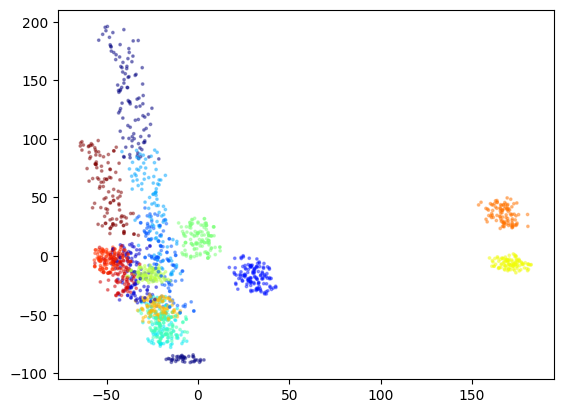

In [11]:

pca=PCA(n_components=2)
df_reduced=pca.fit_transform(df.drop(['label'], axis=1))

plt.scatter(df_reduced[:,0],df_reduced[:,1], cmap='jet', c=[label_cat.index(y) for y in df.label], s=3, alpha=0.4)

plt.show()


# Preprocessing

In [12]:
X = df
y = X.pop(label)


#Splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_RATIO, shuffle = True, stratify=y, random_state = SEED)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Build model

In [16]:

# Define the parameter grid for the grid search
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
    }

svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Parameters:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy: 99.83%
Test Accuracy: 100.00%


In [22]:
import pickle
# save the model to disk
filename = '../model/svm_best.pkl'
pickle.dump(best_model, open(filename, 'wb'))